In [ ]:
import pandas as pd
import numpy as np  #حقت العمليات
import seaborn as sns # حقت الرسمات
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #ذا حق الارقام يقرب لي الرقم الى واحد او صفر


In [ ]:
dataset = pd.read_csv("diabetes.csv")

print(dataset) # p كم حمل \ g تركيز الجلكوز \ b ضغط الدم \ s طبقة الجلد \ i قياس الانسولين من ناحية المدة الزمنيه  \ bb قياس كتلة الجسم
# d كم نسبة السكر  عشان احدد اذا كانت اول مره \ a العمر \ o النتيجة عشان احدد عنده ولا لا
# الاوتبوت اسمه تارقيت
# الباقيه فيتشر

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
dataset.head() # اول 5 سطر

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.isnull().sum() # يشوف هل في نل او لا في كل عامود ويجمعهم  واذا لا يحط صفر

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataset.info() # معلومات البيانات

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

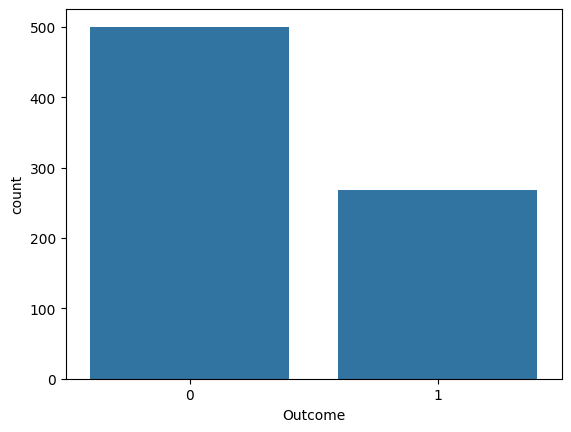

In [ ]:
sns.countplot(x=dataset['Outcome'])# رسم الاوتبوت
# اللي ما عندهم سكر عددهم اكبر

In [ ]:
x = dataset.iloc[:, 1:8] # ترين
y = dataset.iloc[:, 8] # تيست
print("Features ")
print(x)
# تقسيم البيانات عشان الترين والتيست
# ايش الصفات اللي تحدد اذا عنده سكر ولا لا
# من عامود واحد الى ٧ ثمانيه غير محسوبه ، وما حسب عدد مرات الحمل
# حذف اول عامود لانه ما ياثر ، حذف الاخير عشان يدربه


Features 
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ... 

In [ ]:
y = dataset.iloc[:, 8]
print("Target ") # طبع اللاوتبوت
print(y)

Target 
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.25, random_state =42) # قسم الداتا لترين وتيست
# التيست ٢٥
# الترين ٧٥

In [ ]:
sc_x = StandardScaler() # قرب الارقام الى اقرب عشره ويطبع اول عشره

xtrain = sc_x.fit_transform(xtrain)

xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[ 0.25977903 -3.78077929  0.61677038 -0.69205168  1.03974028  0.29608546
   0.96352088]
 [ 0.25977903  0.89724451 -0.03210586  1.63307692  0.40945373 -0.70087555
  -0.86295593]
 [-1.85825286  0.67966201  0.48699513 -0.69205168  0.31753694 -0.66548048
   1.13747105]
 [-1.2353023   0.13570575 -0.35654397 -0.03757104 -0.24709476  0.2311945
  -0.68900576]
 [-0.58120422  0.29889263  0.16255702 -0.69205168 -4.19951667  0.30493422
  -1.03690611]
 [-0.6746468  -0.84341551 -0.09699348  0.04854483 -0.8379884  -0.92799388
  -0.77598085]
 [-0.42546658 -0.4082505   0.61677038 -0.05479422  0.60641828  0.85060815
  -0.68900576]
 [ 1.53682767 -0.29945925  1.07098374  1.24555549  0.33066791 -0.33217695
  -0.25413033]
 [-1.11071219  0.244497   -1.32985833 -0.69205168 -0.24709476 -0.49735392
   0.1807451 ]
 [-0.58120422  0.46207951  1.26564661  0.08299118  0.33066791 -0.68022843
  -0.77598085]]


In [ ]:
# Create and train the Naive Bayes model (Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB() # اخذ اوبجيكت
classifier.fit(xtrain, ytrain) # دخل الداتا حقت الترين والتيست في النييف بيس

GaussianNB()

In [ ]:
train_score = classifier.score(xtrain, ytrain)
print(f'The Accuracy of training: {round(train_score*100, 2)} %') #  نسبة الترين والتيست  للدقة

The Accuracy of training: 76.04 %


In [ ]:
test_score = classifier.score(xtest, ytest)
print(f'Model Score/Performance on Testing data: {round((test_score*100), 2)}')

Model Score/Performance on Testing data: 72.92


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
#Classifier is Object

classifier.fit(xtrain, ytrain)# دخلت الداتا حقت الترين والتيست في اللوجكل ريقرشن

LogisticRegression()

In [ ]:
train_score = classifier.score(xtrain, ytrain)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

The Accuracy of training: 78.47 %


In [ ]:
test_score = classifier.score(xtest, ytest)
print(f'Model Score/Performance on Testing data: {round((test_score*100), 2)}')

Model Score/Performance on Testing data: 73.44


In [ ]:
from sklearn import metrics # سوينا  نظام الاعمده
predictions = classifier.predict(xtest) # يتوقع التيست
print(metrics.confusion_matrix(ytest,predictions))
print(metrics.classification_report(ytest,predictions))
print(metrics.accuracy_score(ytest,predictions))

# الزقرشن يعتبر افضل لان الاكيسرسي افضل

[[100  23]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       123
           1       0.64      0.59      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.71       192
weighted avg       0.73      0.73      0.73       192

0.734375
